In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "new_content.txt"

In [4]:
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/pepo_abdo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pepo_abdo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pepo_abdo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words("english"))
words_filtered = [word for word in words if word not in stop_words]

In [8]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

In [9]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [10]:
print('The average sentiment is:', average_sentiment)

The average sentiment is: 0.02260734163941027


- the average sentiment score of approximately 0.0226 suggests that the analyzed text or content tends to have a slightly positive sentiment, but it is very close to neutral. 
- values close to zero suggesting neutral sentiment.

In [11]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [61]:
print('The positive words are:', positive_words)

The positive words are: ['remarkable', 'inspiring', 'energizing', 'creative', 'euphoric', 'feelings', 'love', 'feelings', 'better', 'help', 'play', 'creative', 'fresh', 'optimal', 'talent', 'yes', 'help', 'create', 'solutions', 'help', 'progress', 'feeling', 'fun', 'help', 'creatively', 'flexible', 'smart', 'well', 'efficient', 'restore', 'good', 'love', 'shares', 'help', 'solid', 'help', 'restore', 'dignity', 'fine', 'fine', 'helping', 'happy', 'healthy', 'courageous', 'love', 'fans', 'favorite', 'cared', 'special', 'dedicated', 'yummy', 'prepared', 'joy', 'shares', 'safe', 'inspiring', 'significant', 'shares', 'good', 'important', 'favors', 'bravery', 'like', 'creating', 'effective', 'restore', 'help', 'precious', 'peace', 'shares', 'create', 'shares', 'help', 'yes', 'help', 'natural', 'help', 'save', 'hope', 'alive', 'straight', 'freeing', 'pretty', 'value', 'yes', 'value', 'help', 'recommend', 'greatest', 'straight', 'clearly', 'hopes', 'dreams', 'cheering', 'favorite', 'expand', '

In [62]:
print('The negative words are:', negative_words)

The negative words are: ['pain', 'heartbreak', 'forget', 'danger', 'demand', 'bad', 'lazy', 'shamed', 'rejected', 'anxiety', 'missing', 'messy', 'uncertain', 'death', 'blocks', 'avoid', 'unpleasant', 'stressed', 'forget', 'collapse', 'battleground', 'awkward', 'hard', 'wrong', 'collapsed', 'crisis', 'irrational', 'misinformation', 'polluted', 'lower', 'protests', 'war', 'killed', 'enemy', 'suicide', 'worst', 'crisis', 'lost', 'mourning', 'messy', 'grief', 'boring', 'crisis', 'limited', 'alone', 'lowest', 'attacks', 'accidents', 'frustrated', 'painful', 'discouraging', 'dilemma', 'slash', 'hurt', 'battle', 'evil', 'lose', 'punished', 'problems', 'obsession', 'anxious', 'struggle', 'skeptic', 'scary', 'weapons', 'blocks', 'ghost', 'ghost', 'pay', 'ghost', 'struggles', 'restless', 'desperate', 'pay', 'infected', 'stop', 'crimes', 'uncomfortable', 'recession', 'problem', 'stress', 'stop', 'faking', 'troubling', 'punish', 'intimidates', 'insults', 'lost', 'loss', 'error', 'problem', 'losing

In [63]:
print('The neutral words are:', neutral_words)

The neutral words are: ['next', 'time', 'see', 'insect', 'consider', 'tiny', 'brains', 'lead', 'computers', 'think', 'potential', 'offer', 'us', 'future', 'albums', 'books', 'get', 'gears', 'spinning', 'intoxicating', 'new', 'theres', 'lot', 'going', 'brain', 'drive', 'millennials', 'gen', 'z', 'spend', 'worlds', 'wallet', 'whopping', '30', 'trillion', 'us', 'dollars', 'inherit', 'investor', 'making', 'case', 'funding', 'environmental', 'social', 'governance', 'priorities', 'make', 'world', 'buying', 'kids', 'bestrated', 'toys', 'games', 'really', 'want', 'child', 'learn', 'grow', 'need', 'prioritize', 'time', 'part', 'artist', 'started', 'revolution', 'enlisted', 'dozens', 'schools', 'libraries', 'museums', 'homeowners', 'drive', 'climate', 'action', 'awareness', 'rising', 'sea', 'levels', 'miami', 'community', 'microinternships', 'expanded', 'candidate', 'screening', 'policies', '5', 'takes', 'hiring', 'finding', 'new', 'job', 'spoiler', 'even', 'learn', 'migration', 'patterns', 'hab

In [12]:
len(neutral_words) , len(positive_words) , len(negative_words)

(274534, 35210, 18289)

In [13]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

-  this analysis has identified 956 unique positive words, and these words collectively appear a total of 35,210 times in the text corpus

In [14]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 956 samples and 35210 outcomes>


In [15]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 1118 samples and 18289 outcomes>


In [16]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 20173 samples and 274534 outcomes>


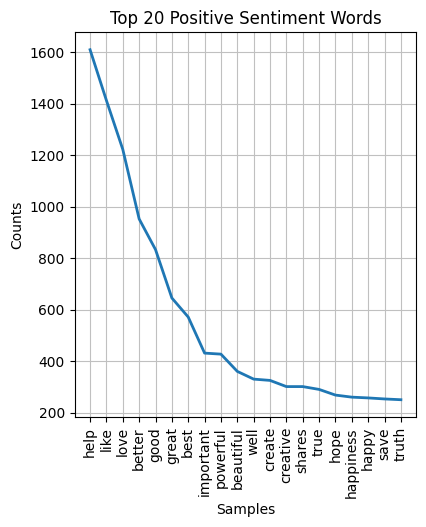

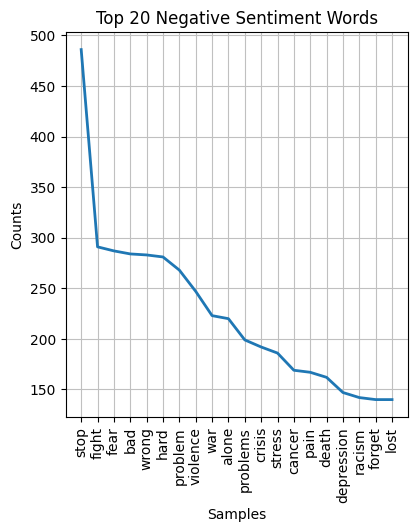

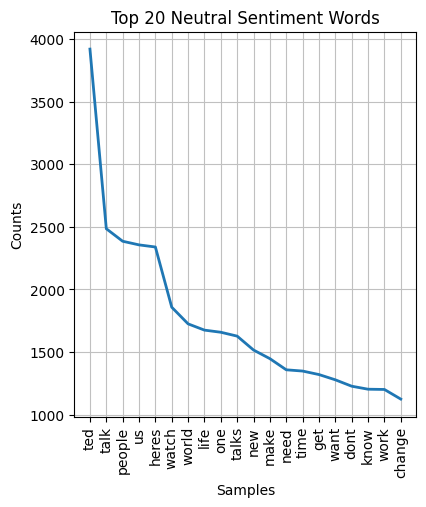

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [19]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

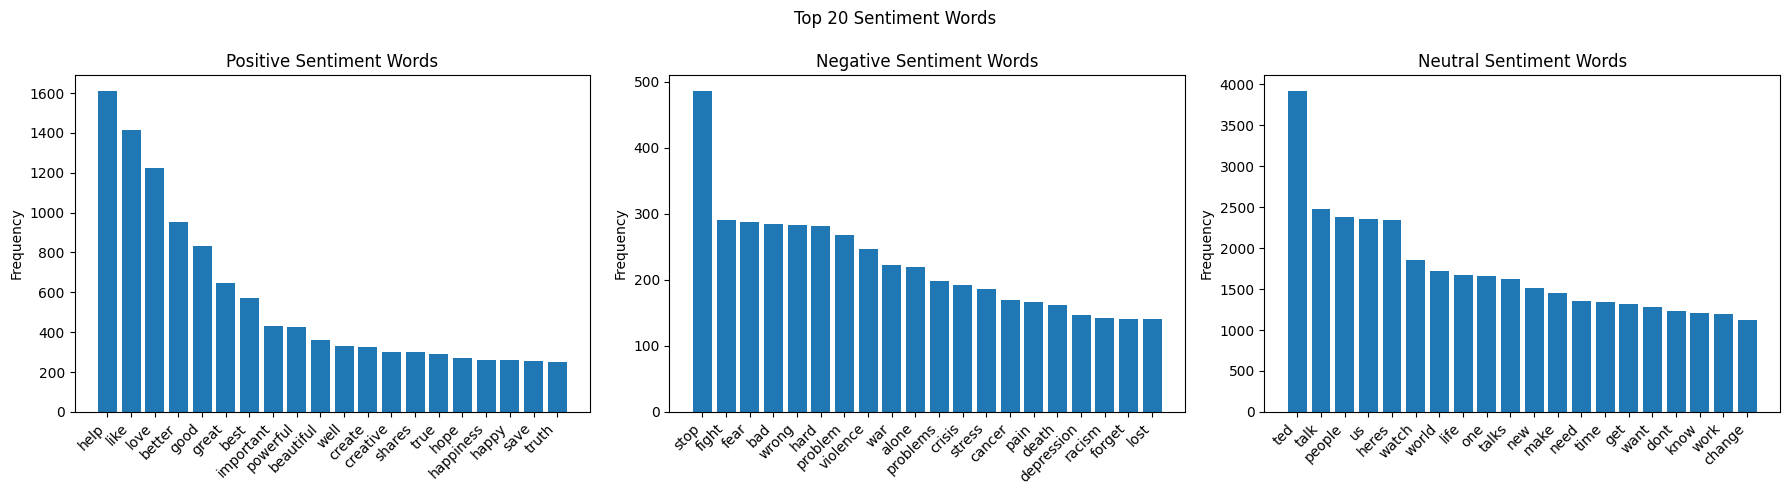

In [23]:
import matplotlib.pyplot as plt

# Set up subplots for positive, negative, and neutral sentiment words
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Top 20 Sentiment Words")

# Plot for positive sentiment words
axes[0].bar(df_positive['Word'], df_positive['Frequency'])
axes[0].set_title("Positive Sentiment Words")
axes[0].set_xticklabels(df_positive['Word'], rotation=45, ha='right')
axes[0].set_ylabel("Frequency")

# Plot for negative sentiment words
axes[1].bar(df_negative['Word'], df_negative['Frequency'])
axes[1].set_title("Negative Sentiment Words")
axes[1].set_xticklabels(df_negative['Word'], rotation=45, ha='right')
axes[1].set_ylabel("Frequency")

# Plot for neutral sentiment words
axes[2].bar(df_neutral['Word'], df_neutral['Frequency'])
axes[2].set_title("Neutral Sentiment Words")
axes[2].set_xticklabels(df_neutral['Word'], rotation=45, ha='right')
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the space for the suptitle
plt.show()


In [24]:
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

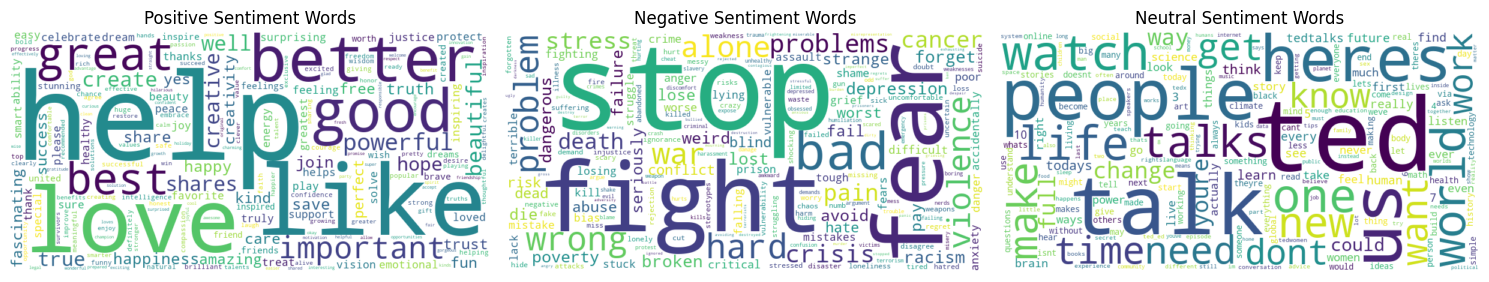

In [73]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

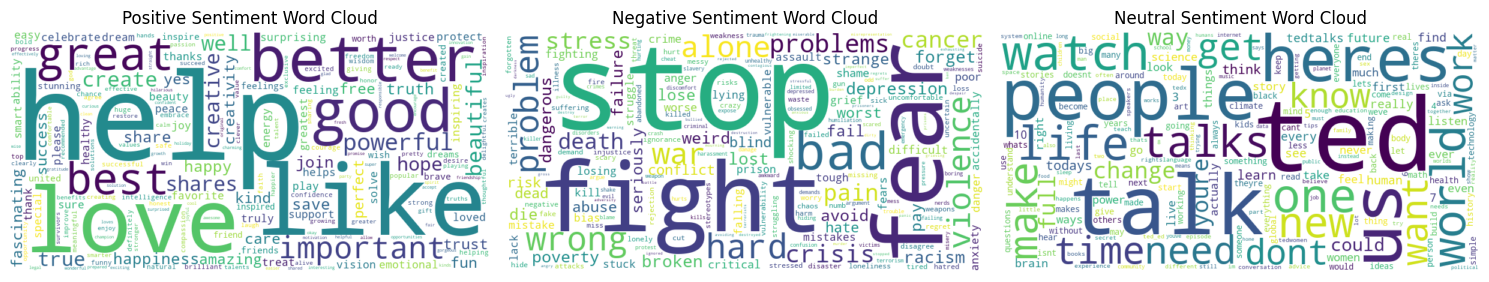

In [74]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")

plt.tight_layout()
plt.show()

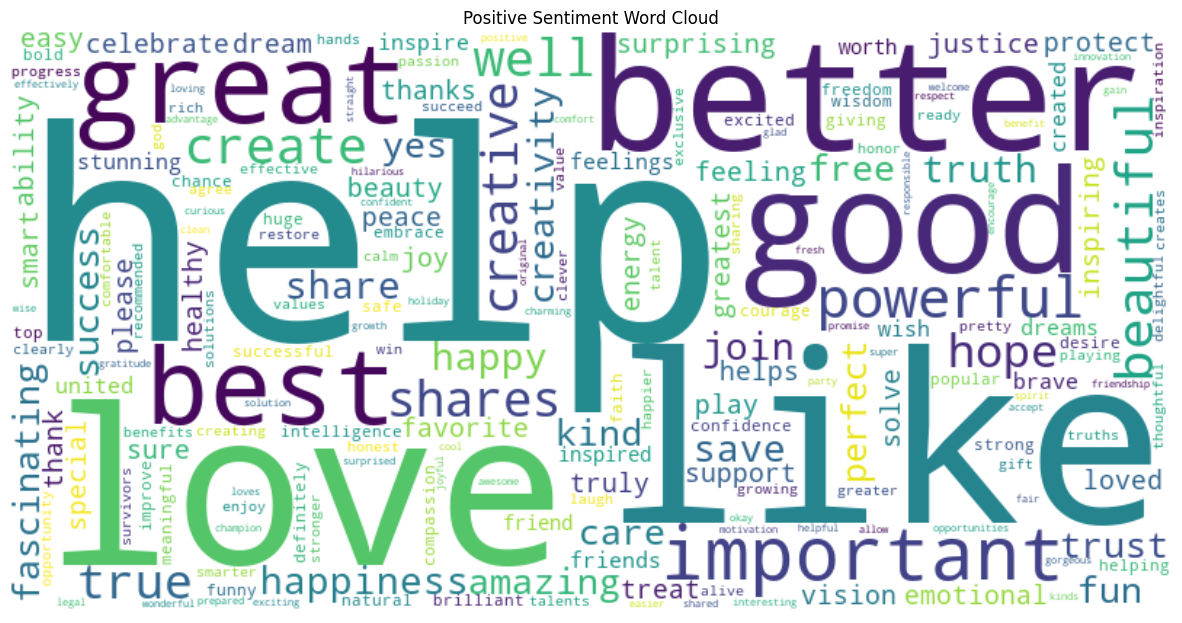

In [75]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

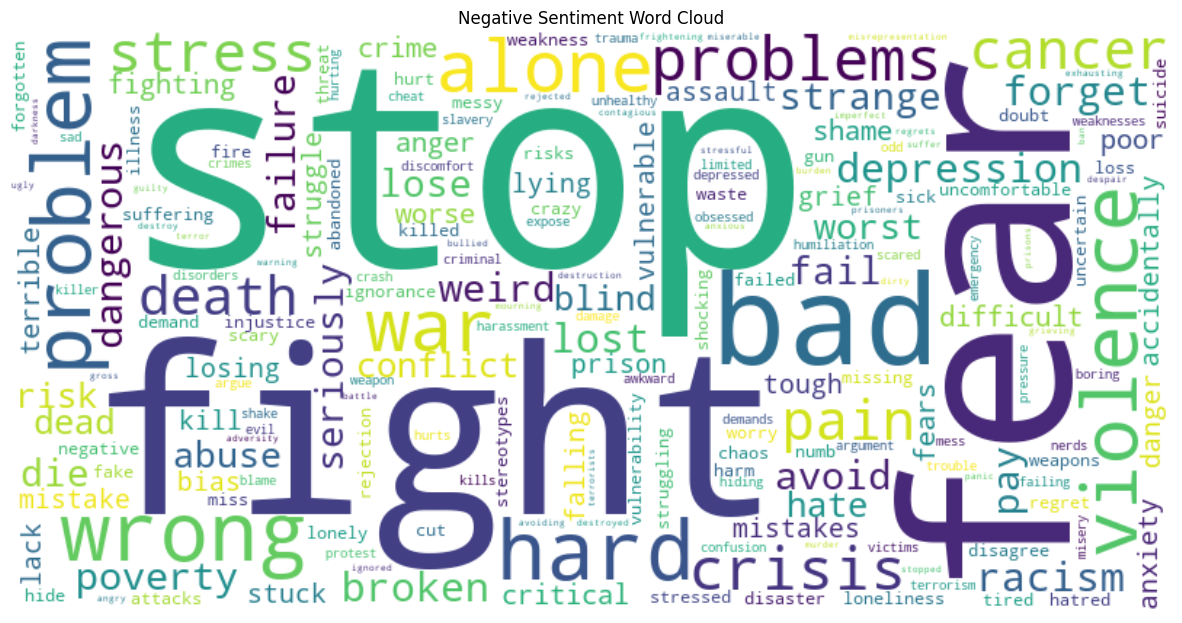

In [76]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

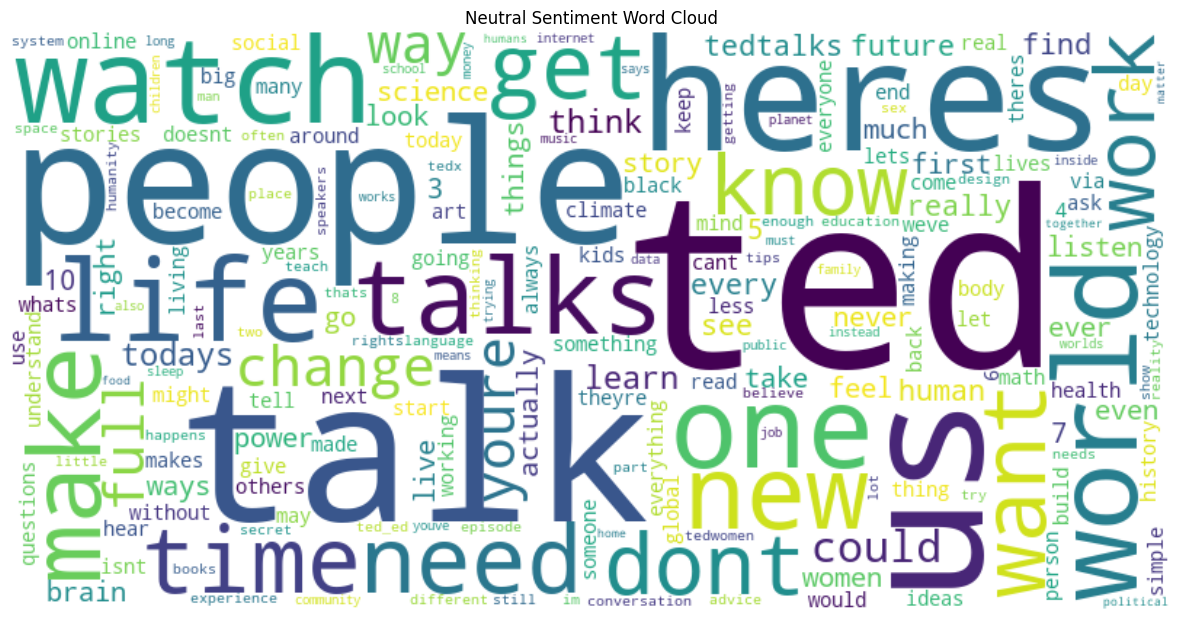

In [77]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [25]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

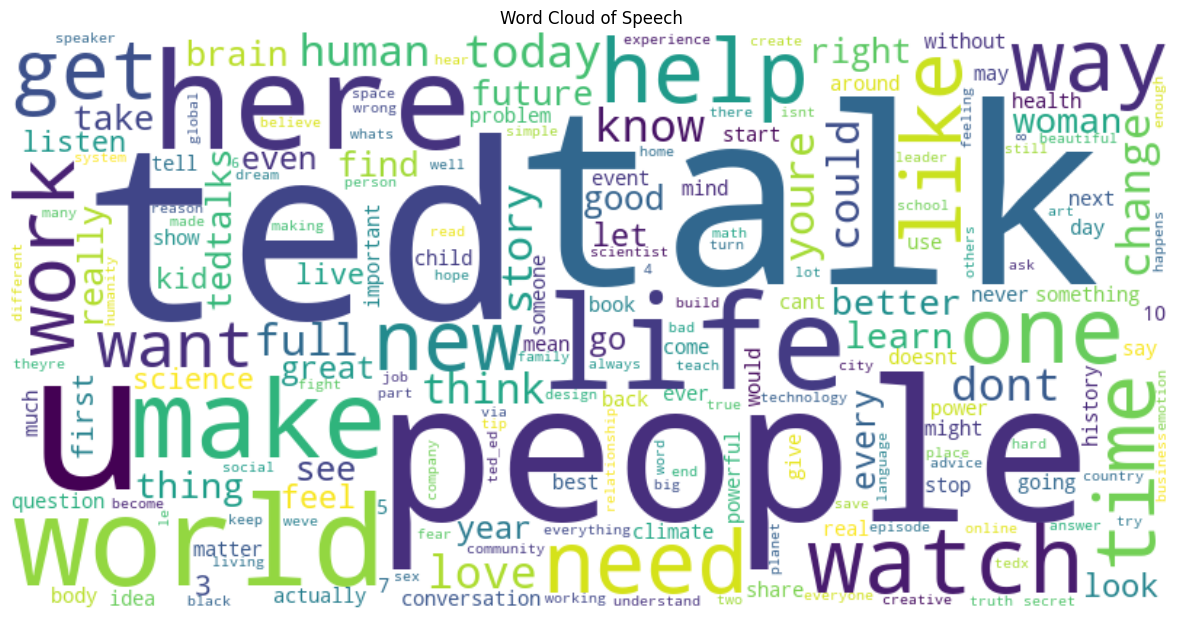

In [79]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

In [26]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 10.73367618501797
Negative Sentiment Percentage: 5.575353699170511
Neutral Sentiment Percentage: 83.69097011581151


In [27]:
data = {'Sentiment': ['Positive', 'Negative', 'Neutral'],
        'Percentage': [positive_percentage, negative_percentage, neutral_percentage]}

In [28]:
df_percentages = pd.DataFrame(data)

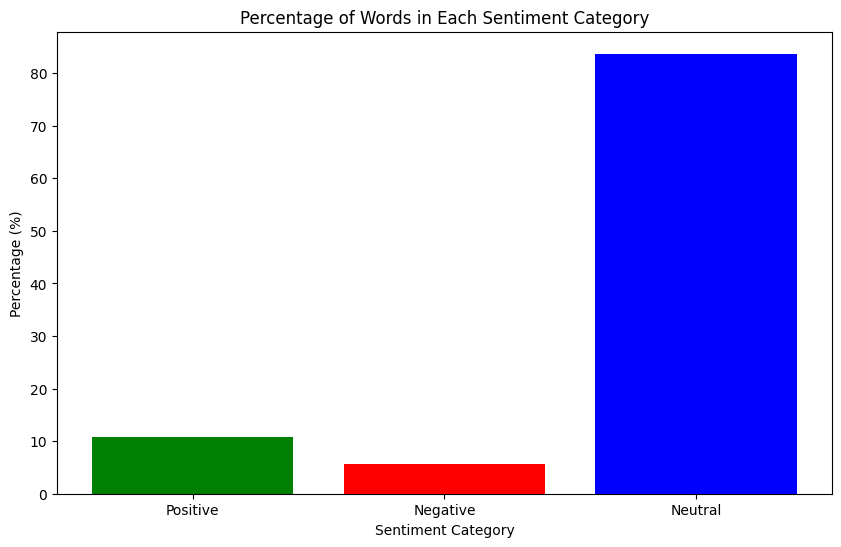

In [30]:
import matplotlib.pyplot as plt

# Data for plotting
sentiments = df_percentages['Sentiment']
percentages = df_percentages['Percentage']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sentiments, percentages, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Words in Each Sentiment Category')

# Display the plot
plt.show()


In [84]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [85]:
dictionary = corpora.Dictionary([words_filtered])

In [86]:
corpus = [dictionary.doc2bow(words_filtered)]

In [87]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.001*"ted" + 0.001*"heres" + 0.000*"talk" + 0.000*"life" + 0.000*"help"')
(1, '0.000*"ted" + 0.000*"talk" + 0.000*"heres" + 0.000*"us" + 0.000*"people"')
(2, '0.000*"ted" + 0.000*"us" + 0.000*"talk" + 0.000*"people" + 0.000*"world"')
(3, '0.012*"ted" + 0.007*"talk" + 0.007*"people" + 0.007*"us" + 0.007*"heres"')
(4, '0.001*"ted" + 0.001*"heres" + 0.001*"people" + 0.000*"talk" + 0.000*"life"')


In [88]:
# !pip install spacy
#!python -m spacy download en_core_web_sm

In [90]:
# import spacy

# nlp = spacy.load("en_core_web_sm")
# nlp.max_length = 5000000  # Set it to a suitable value for your text size
# doc = nlp(speech_text)
# entities = [(ent.text, ent.label_) for ent in doc.ents]

# for entity, label in entities:
#     print(f"Entity: {entity}, Label: {label}")

Entity: 30 trillion US dollars, Label: MONEY
Entity: dozens, Label: CARDINAL
Entity: Miami, Label: GPE
Entity: 5, Label: CARDINAL
Entity: $1 billion, Label: MONEY
Entity: 4, Label: CARDINAL
Entity: Vimeo, Label: PERSON
Entity: Anjali Sud, Label: PERSON
Entity: Indigenous and Western sciences, Label: ORG
Entity: Love, Label: WORK_OF_ART
Entity: 3, Label: CARDINAL
Entity: Twitter, Label: PERSON
Entity: @Catalincatel 🫶, Label: FAC
Entity: #, Label: CARDINAL
Entity: Reply, Label: ORG
Entity: 2022, Label: DATE
Entity: #, Label: CARDINAL
Entity: Hours, Label: TIME
Entity: Kellogg’s, Label: ORG
Entity: Korean, Label: NORP
Entity: @Castbox_fm, Label: ORG
Entity: Christiane Amanpour, Label: PERSON
Entity: TED Membership, Label: PERSON
Entity: Iran, Label: GPE
Entity: Ukraine, Label: GPE
Entity: H2O, Label: GPE
Entity: Adam Garone, Label: PERSON
Entity: about #Movember, Label: MONEY
Entity: Caroline Paul, Label: PERSON
Entity: Giulia Ender, Label: PERSON
Entity: decades, Label: DATE
Entity: Gala

In [ ]:
# !pip install keybert

In [95]:
from keybert import KeyBERT
kw_extractor = KeyBERT()
keywords = kw_extractor.extract_keywords(speech_text)
for keyword in keywords:
    print(keyword[0])

innovate
innovating
innovators
adopt
exploring


In [ ]:
# ! pip install nrclex

In [34]:
from nrclex import NRCLex
text_emotion = NRCLex(speech_text_cleaned)
emotions = text_emotion.affect_frequencies
for emotion, frequency in emotions.items():
    print(f"Emotion: {emotion}, Frequency: {frequency}")

Emotion: fear, Frequency: 0.09321283005493532
Emotion: anger, Frequency: 0.05713273081694134
Emotion: anticip, Frequency: 0.0
Emotion: trust, Frequency: 0.12306101955224762
Emotion: surprise, Frequency: 0.04615157422174966
Emotion: positive, Frequency: 0.2487565715635891
Emotion: negative, Frequency: 0.11725441550002953
Emotion: sadness, Frequency: 0.06643038572863134
Emotion: disgust, Frequency: 0.037037037037037035
Emotion: joy, Frequency: 0.10025990903183886
Emotion: anticipation, Frequency: 0.11070352649300018


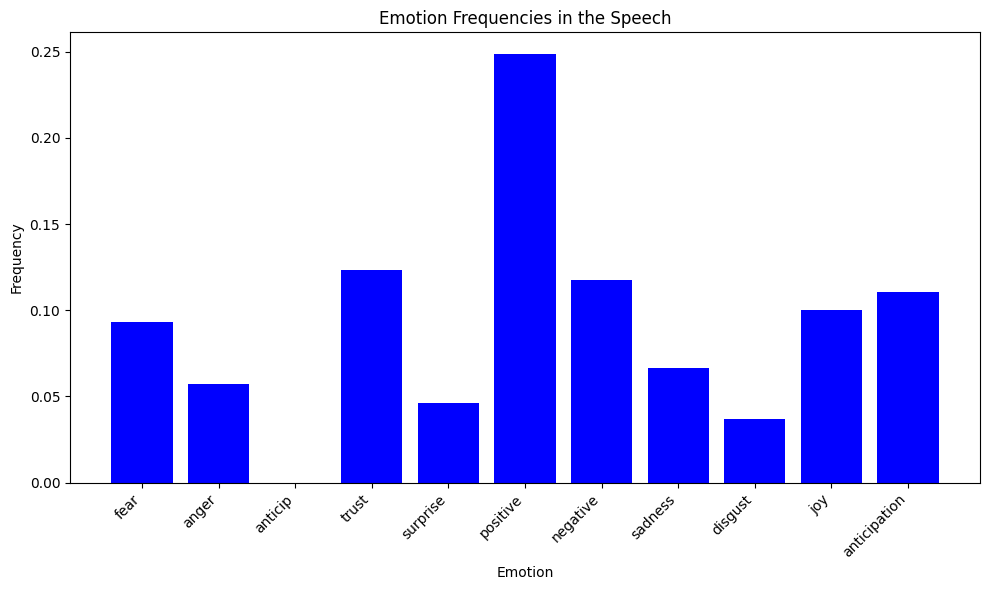

In [35]:
data = {'Emotion': [], 'Frequency': []}
for emotion, frequency in emotions.items():
    data['Emotion'].append(emotion)
    data['Frequency'].append(frequency)

df_emotions = pd.DataFrame(data)

import matplotlib.pyplot as plt

# Data for plotting
emotions = df_emotions['Emotion']
frequencies = df_emotions['Frequency']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, frequencies, color='blue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Frequencies in the Speech')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [99]:
# !pip install textstat

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 679.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [102]:
import textstat
#measures the ease of readability of a text, with higher scores indicating easier-to-read text.
flesch_score = textstat.flesch_reading_ease(speech_text_cleaned)
#represents the U.S. grade level required to understand the text
flesch_grade = textstat.flesch_kincaid_grade(speech_text_cleaned)
#The SMOG Index estimates the years of education required to understand a text,
# with higher values indicating more complex text.
smog_index = textstat.smog_index(speech_text_cleaned)
# the years of education required to understand a text
print(f"Flesch Reading Ease Score: {flesch_score}")
print(f"Flesch-Kincaid Grade Level: {flesch_grade}")
print(f"SMOG Index: {smog_index}")

Flesch Reading Ease Score: -594520.94
Flesch-Kincaid Grade Level: 228471.5
SMOG Index: 0.0


# Pointwise Mutual Information (PMI) scores for  bigrams

In [101]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

tokens = nltk.word_tokenize(speech_text_cleaned)

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens) # finder will be used to identify and score bigram collocations.

pmi_scores = finder.score_ngrams(bigram_measures.pmi) #use PMI as the scoring measure.

for bigram, pmi in pmi_scores[:10]:
    print(f"Bigram: {bigram}, PMI: {pmi}")

Bigram: ('14yearold', 'sstevensmusic'), PMI: 19.160482051388023
Bigram: ('2004', '191'), PMI: 19.160482051388023
Bigram: ('2020visionquest', '_danhabib'), PMI: 19.160482051388023
Bigram: ('235pound', 'spacesuit'), PMI: 19.160482051388023
Bigram: ('26000pound', 'atmospheric'), PMI: 19.160482051388023
Bigram: ('262000', 'printed'), PMI: 19.160482051388023
Bigram: ('2700', 'liters'), PMI: 19.160482051388023
Bigram: ('2day', 'brac'), PMI: 19.160482051388023
Bigram: ('360i', 'peterfriedman'), PMI: 19.160482051388023
Bigram: ('85000', 'kg'), PMI: 19.160482051388023
